From [Ingrid Daubechies' talk](https://youtu.be/tMV61BZCrhk)

![](https://user-images.githubusercontent.com/9312897/116887914-d8a71600-abf8-11eb-8b0a-261590bb5fc9.png)

This is a one-level, and a two-level decomposition with the Haar wavelet.

From [Steven Brunton's GitHub repository](https://github.com/dynamicslab/databook_python/blob/master/CH02/CH02_SEC06_5_WaveletCompress.ipynb).

and

the [associated YT presentation](https://youtu.be/eJLF9HeZA8I).

There is also a [pdf book](http://databookuw.com/databook.pdf).

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


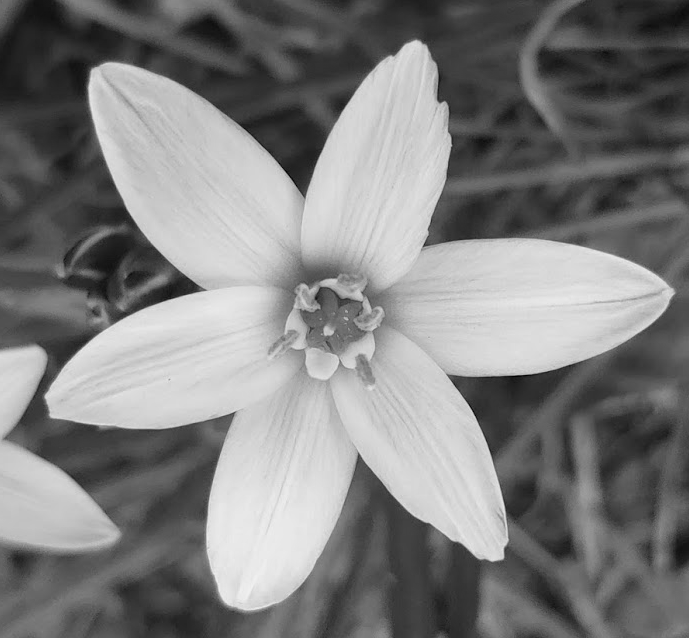

-1

In [ ]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt

import cv2
from google.colab.patches import cv2_imshow

plt.rcParams['figure.figsize'] = [16,16]
plt.rcParams.update({'font.size':18})



from google.colab import drive
drive.mount("/content/drive/")

A = cv2.imread('/content/drive/My Drive/PICTURES/flower.png')

#A = cv2.imread('./flower.png')  # This is temporarily uploaded in the Colab folder to the left. If not uploaded for the session it will not run!!!!
# To upload, click on the folder icon to the left - the image is named 'flower' and kept in Google Drive and Issues repository in GitHub.
B = np.mean(A,-1); # Turns the image into a black and white pic
cv2_imshow(B)
cv2.waitKey()

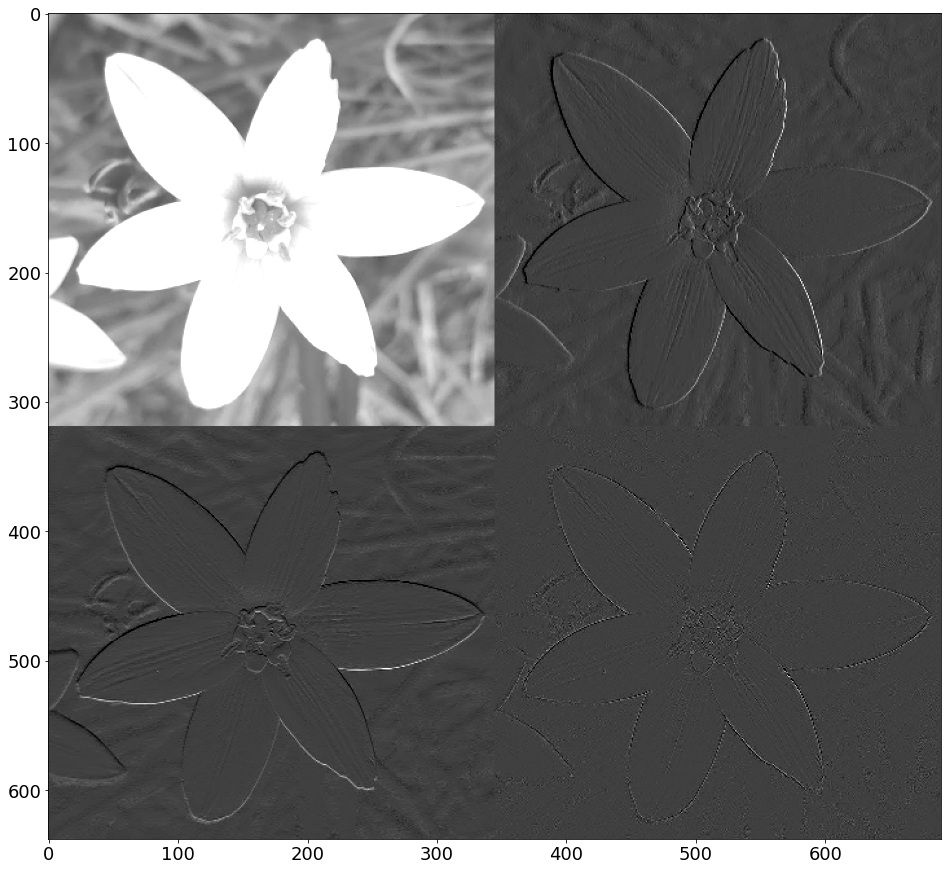

In [ ]:
## Wavelet decomposition
n = 1 # For instance, a 2 would be a two-level decomposition
w = 'db1' # Debauchies mother wavelet
coeffs = pywt.wavedec2(B, wavelet=w, level=n) # wavedec2 is 2D.

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()

![](https://user-images.githubusercontent.com/9312897/116888174-23289280-abf9-11eb-9899-5c0e601b40c6.png)

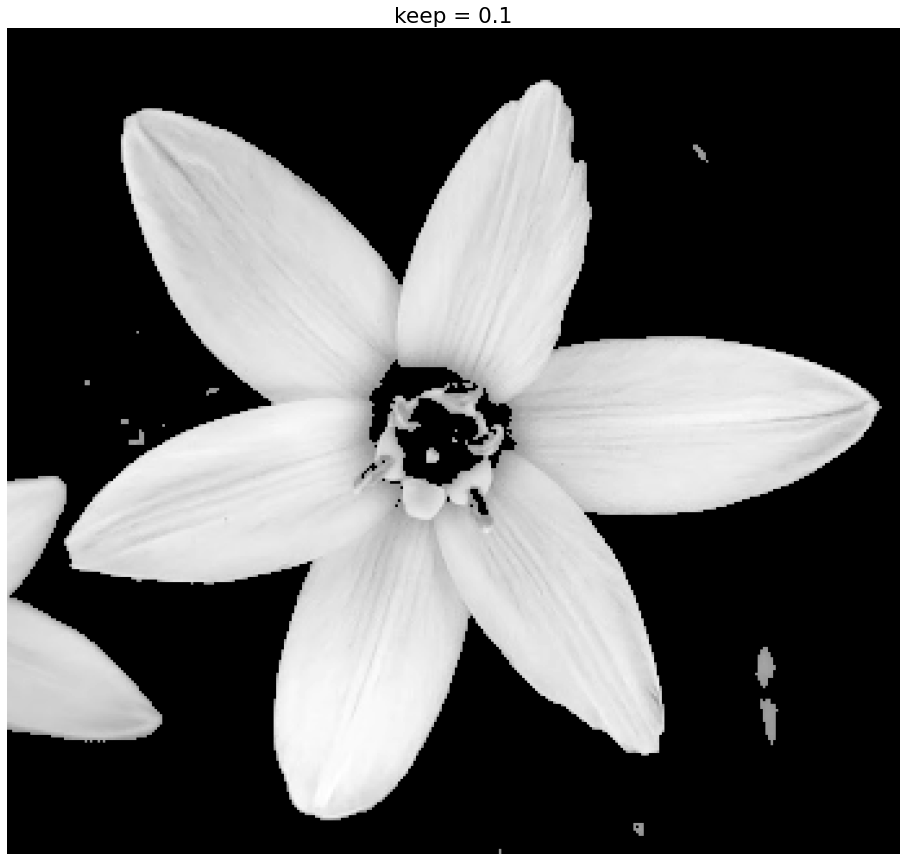

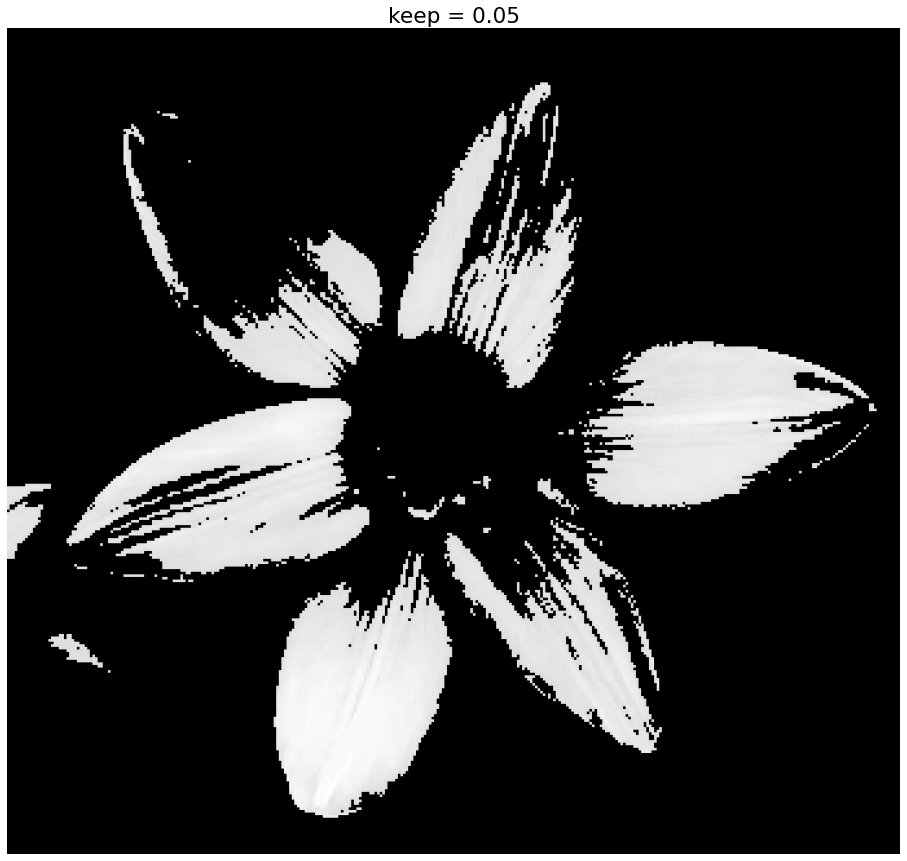

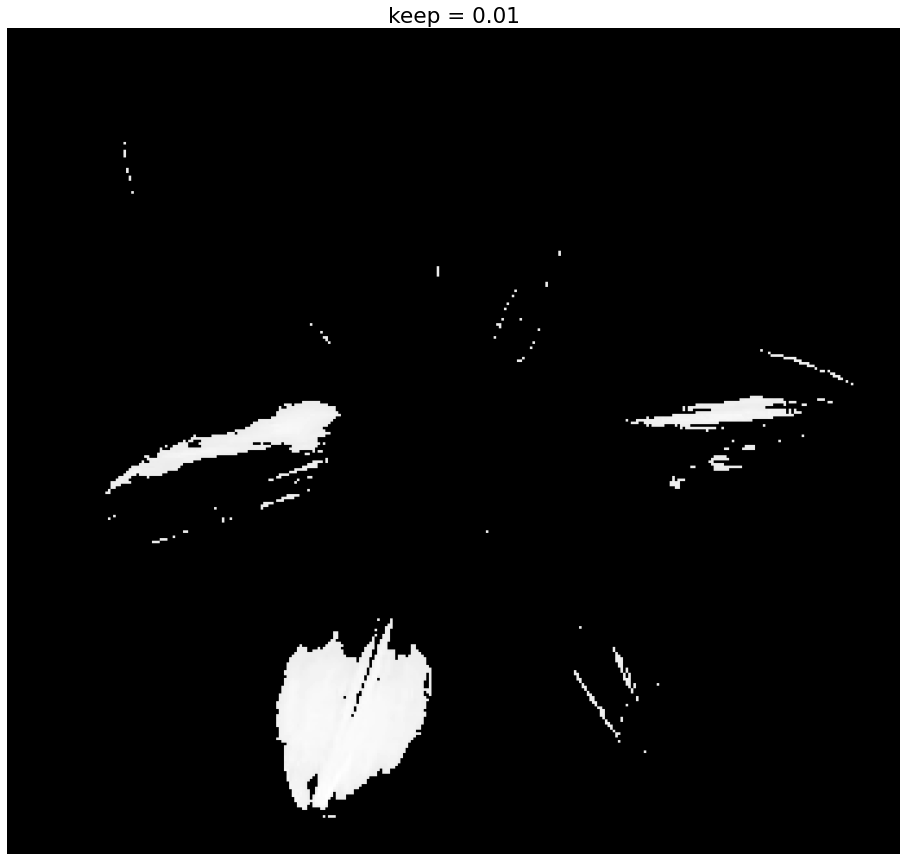

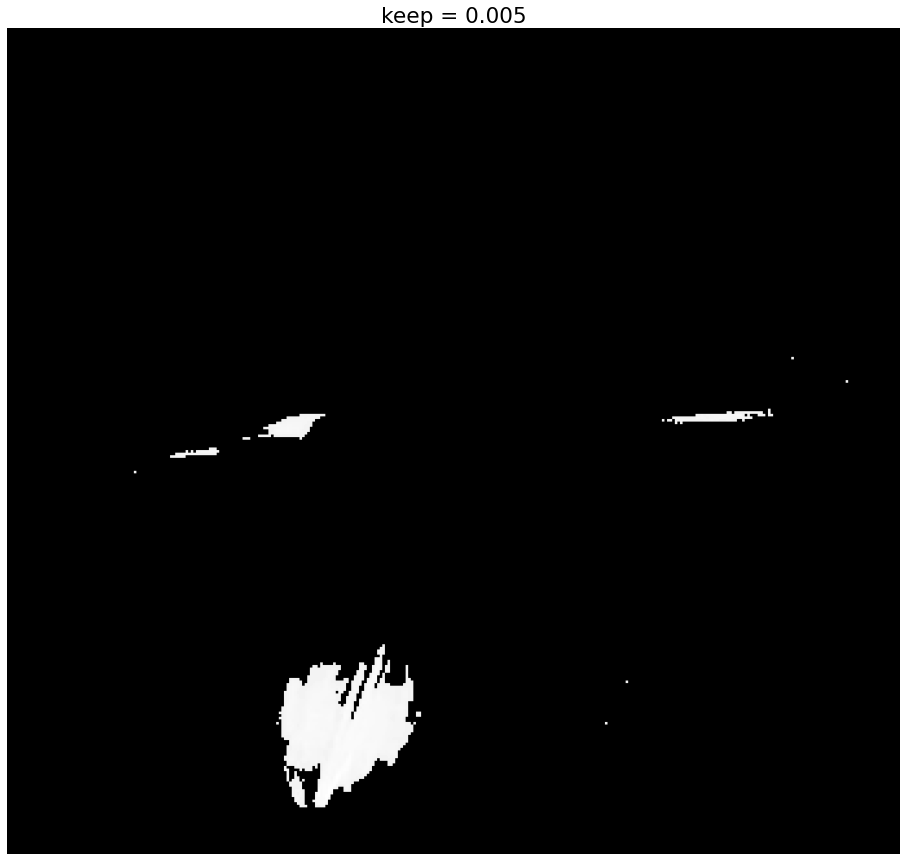

In [ ]:
## Wavelet Compression
n = 1
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005): # Only keep the first 10%, 5%, ...
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices

    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')

    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))

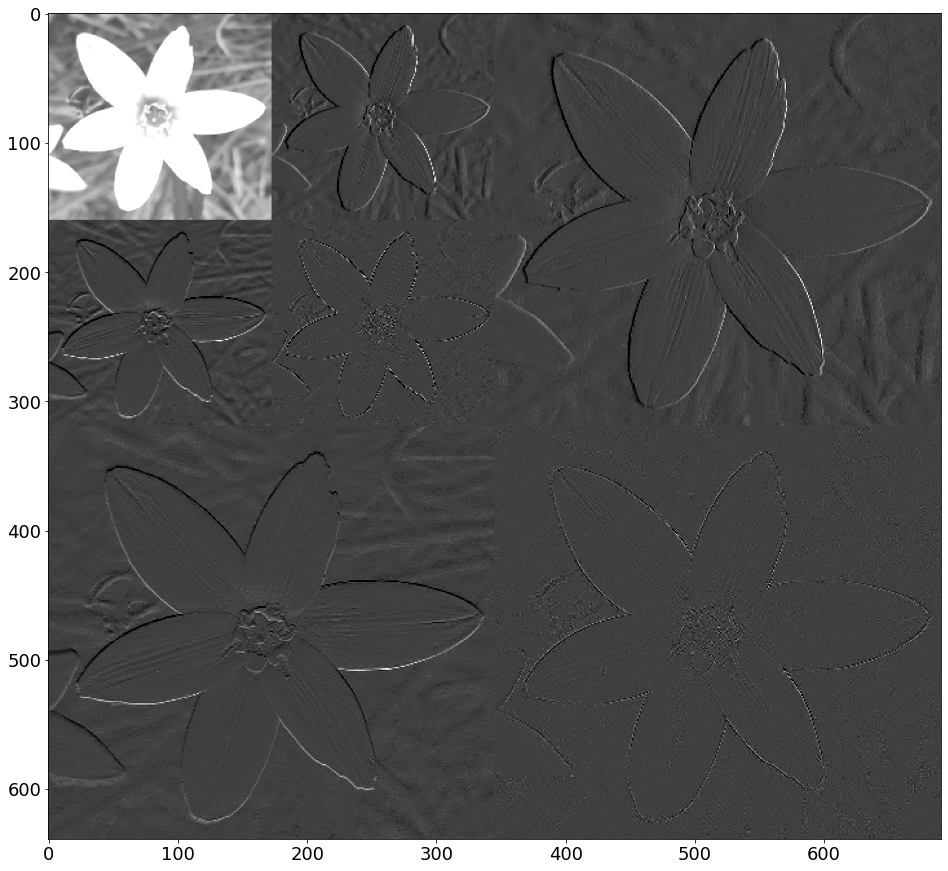

In [ ]:
## Wavelet decomposition
n = 2 # For instance, a 2 would be a two-level decomposition
w = 'db1' # Debauchies mother wavelet
coeffs = pywt.wavedec2(B, wavelet=w, level=n) # wavedec2 is 2D.

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()

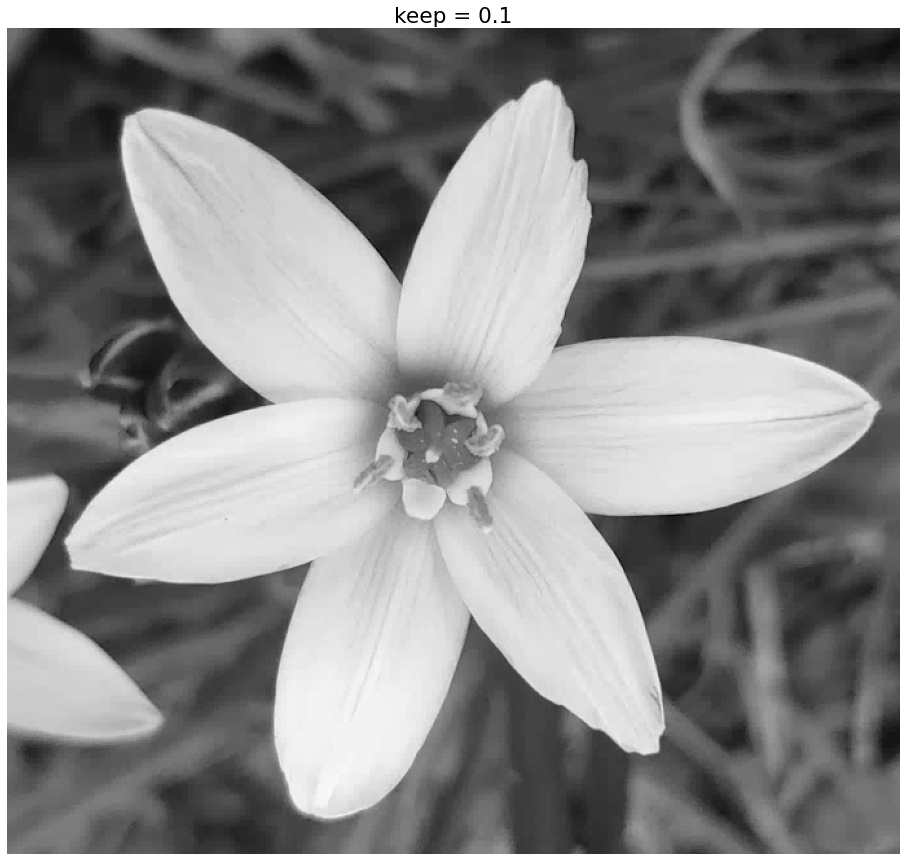

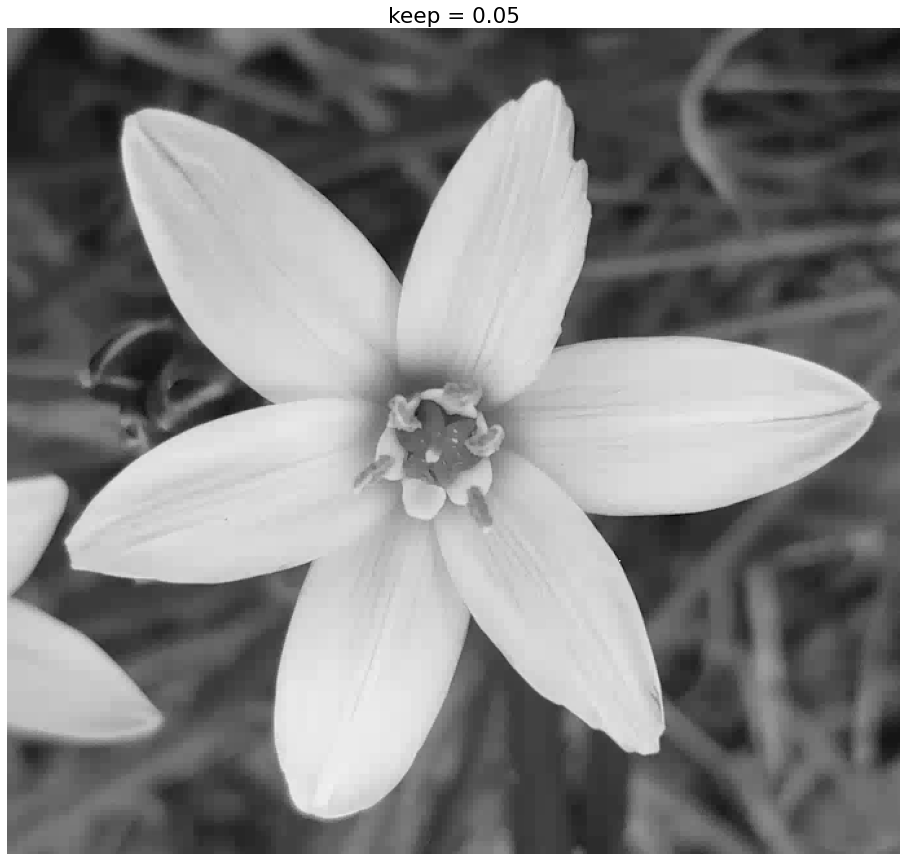

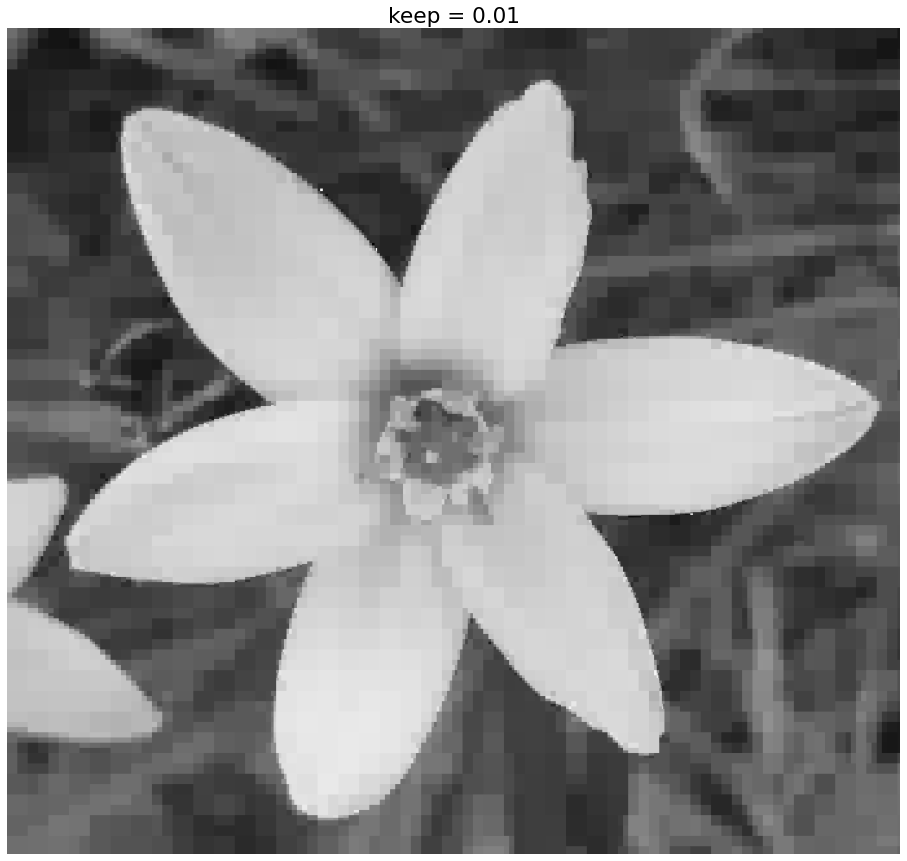

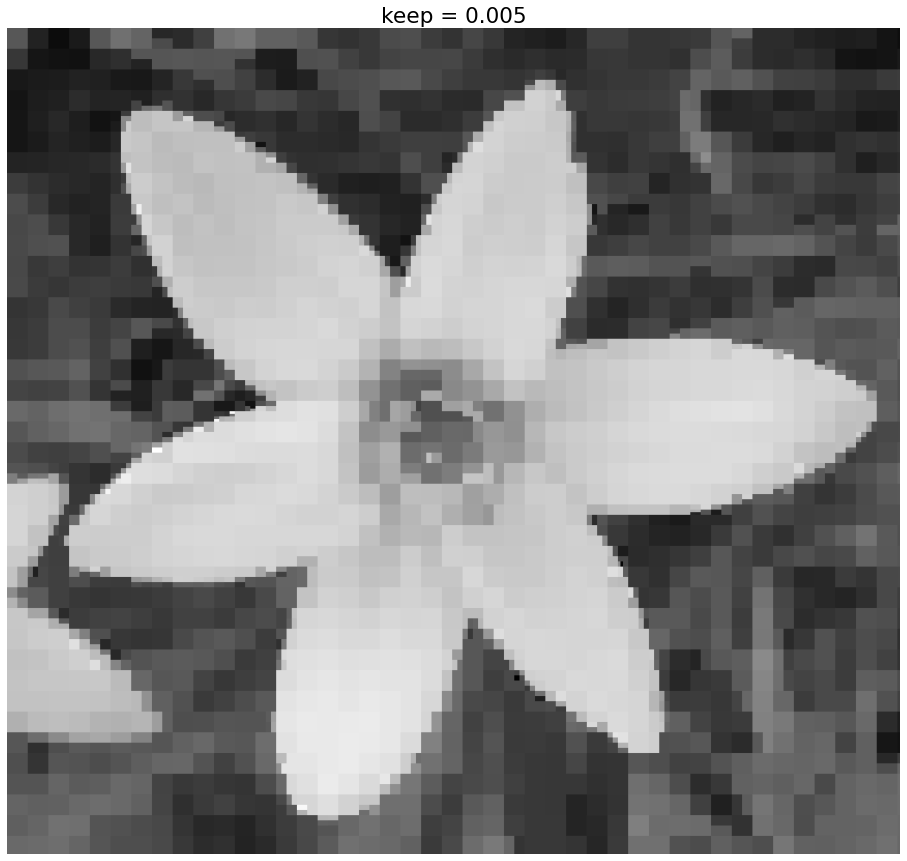

In [ ]:
## Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005): # Only keep the first 10%, 5%, ...
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices

    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')

    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))

In [ ]:
import pywt.data

# Load image
original = pywt.data.camera()
pywt.data.camera().shape

(512, 512)

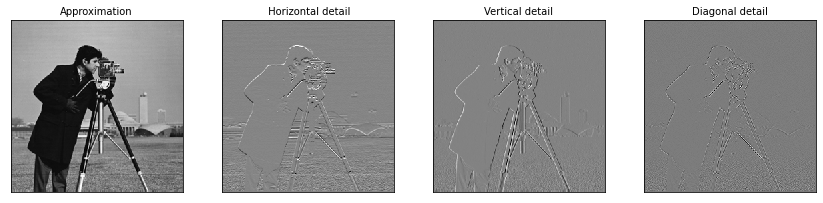

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

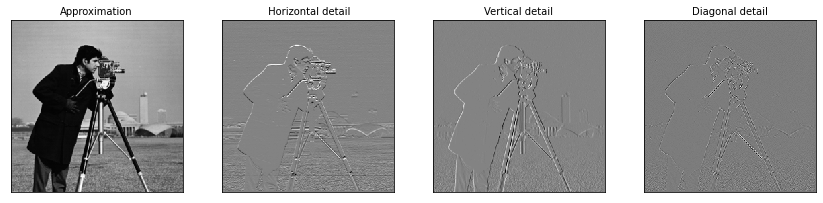

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'db1')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()